In [117]:
import seaborn as sns

In [118]:
penguins = sns.load_dataset("penguins")

naive bayes, knn(k=3), decisione tree(depth=3) 로 펭귄 종을 예측하는 모델을 만들고 학습시키자.

각 모델의 정확도, f1 score, preicision score, recall socre, roc auc score 를 출력하자.

In [119]:
print(penguins.isna().sum())
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [120]:
penguins.dropna(inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [121]:
x = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"]

In [122]:
y = y.map(lambda x : 0 if x =="Adelie" else ( 1 if  x =="Chinstrap" else 2))

In [123]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [126]:
from sklearn.naive_bayes import GaussianNB

In [127]:
model01 = GaussianNB()

In [128]:
model01.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [129]:
predict01 = model01.predict(x_test)

In [130]:
naive_bayes_score = accuracy_score(y_test, predict01)
naive_bayes_score

0.95

In [131]:
proba = model01.predict_proba(x)
proba_class = (proba > 0.8) + 0
proba_class

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

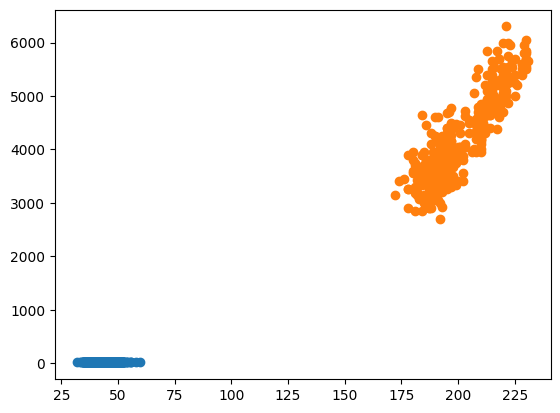

In [132]:
plt.scatter(x["bill_length_mm"], x["bill_depth_mm"])
plt.scatter(x["flipper_length_mm"], x["body_mass_g"])
plt.show()

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
model02 = KNeighborsClassifier(n_neighbors=3)

In [135]:
model02.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [136]:
predict02 = model02.predict(x_test)

In [137]:
knn_score = accuracy_score(y_test, predict02)
knn_score

0.76

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
model03 =  DecisionTreeClassifier()

In [140]:
model03.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [141]:
predict03 = model03.predict(x_test)

In [142]:
model03.score(x_test, y_test)

0.95

In [143]:
model03 = DecisionTreeClassifier(max_depth=3)
model03.fit(x_train, y_train)
decision_tree_score = model03.score(x_test, y_test)
decision_tree_score

0.92

In [152]:
print(f"{naive_bayes_score}")
print(f"{knn_score}")
print(f"{decision_tree_score}")

0.95
0.76
0.92


In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

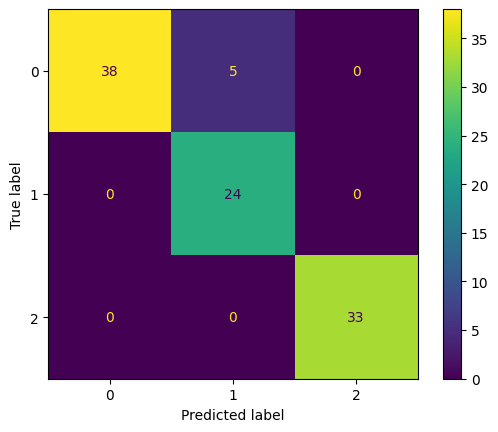

In [148]:
cm01 = confusion_matrix(y_test, predict01)
ConfusionMatrixDisplay(cm01).plot()

In [149]:
cm01.ravel()

array([38,  5,  0,  0, 24,  0,  0,  0, 33])

In [151]:
TP, FN, FP, TN = cm01.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)

ValueError: too many values to unpack (expected 4)